In [1]:
import pandas as pd

df_1=pd.read_csv("C:/Users/dell/Downloads/solarpowergeneration.csv")
df_1.head()

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
0,0.859897,69,28,7.5,0,10.0,75,8.0,29.82,0
1,0.628535,69,28,7.5,0,10.0,77,5.0,29.85,0
2,0.397172,69,28,7.5,0,10.0,70,0.0,29.89,5418
3,0.165810,69,28,7.5,0,10.0,33,0.0,29.91,25477
4,0.065553,69,28,7.5,0,10.0,21,3.0,29.89,30069


In [2]:
features = [
    'distance-to-solar-noon',
    'temperature',
    'wind-direction',
    'wind-speed',
    'sky-cover',
    'visibility',
    'humidity',
    'average-wind-speed-(period)',
    'average-pressure-(period)'
]


In [3]:
target = 'power-generated'


In [4]:
X = df_1[features]
y = df_1[target]



In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [6]:
df_1.dtypes


distance-to-solar-noon         float64
temperature                      int64
wind-direction                   int64
wind-speed                     float64
sky-cover                        int64
visibility                     float64
humidity                         int64
average-wind-speed-(period)    float64
average-pressure-(period)      float64
power-generated                  int64
dtype: object

In [7]:
df_1.isnull().sum()


distance-to-solar-noon         0
temperature                    0
wind-direction                 0
wind-speed                     0
sky-cover                      0
visibility                     0
humidity                       0
average-wind-speed-(period)    1
average-pressure-(period)      0
power-generated                0
dtype: int64

In [8]:
# Fill any missing values in X and y
X_train = X_train.fillna(0)
X_test  = X_test.fillna(0)
y_train = y_train.fillna(0)
y_test  = y_test.fillna(0)


In [9]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


linear reggression → MAE: 5123.43, RMSE: 6280.17, R²: 0.630


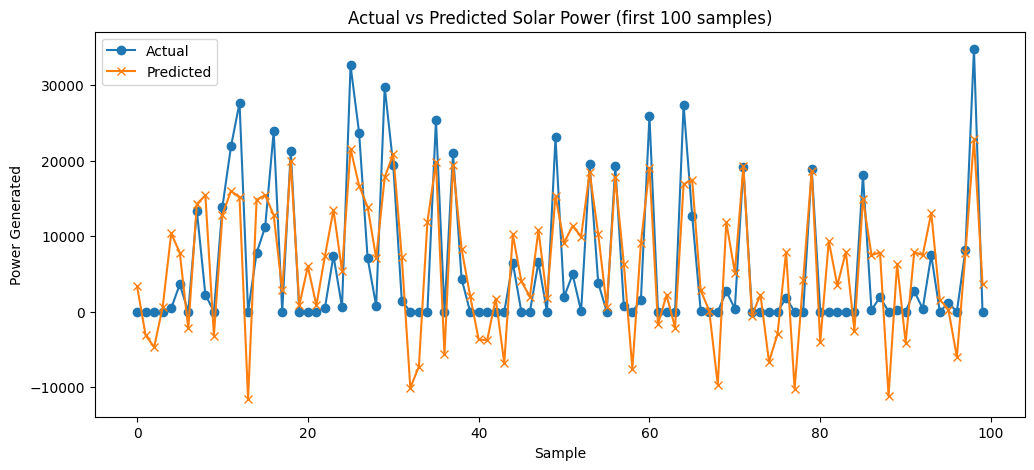

In [ ]:
# Predict solar power on test set
y_pred = model.predict(X_test)

# Compare predicted vs actual
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"linear reggression  → MAE: {mae:.2f}, RMSE: {rmse:.2f}, R²: {r2:.3f}")


plt.figure(figsize=(12,5))
plt.plot(y_test.values[:100], label='Actual', marker='o')
plt.plot(y_pred[:100], label='Predicted', marker='x')
plt.xlabel("Sample")
plt.ylabel("Power Generated")
plt.title("Actual vs Predicted Solar Power (first 100 samples)")
plt.legend()
plt.show()


In [11]:
from sklearn.ensemble import RandomForestRegressor

# Create model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)   # n estimater mean how much trees you want to choose 

# Train model
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)

# Check accuracy
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred_rf)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2 = r2_score(y_test, y_pred_rf)

print(f"Random Forest → MAE: {mae:.2f}, RMSE: {rmse:.2f}, R²: {r2:.3f}")


Random Forest → MAE: 1357.79, RMSE: 2702.85, R²: 0.931


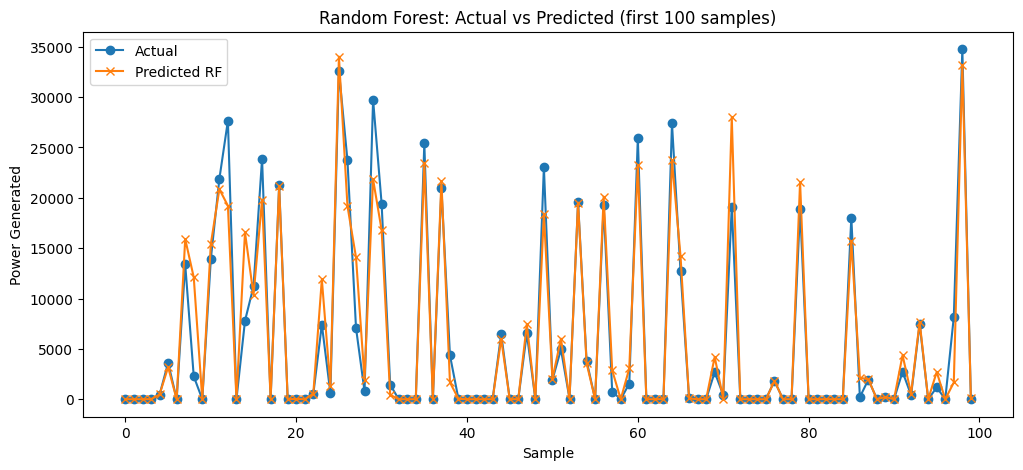

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(y_test.values[:100], label='Actual', marker='o')
plt.plot(y_pred_rf[:100], label='Predicted RF', marker='x')
plt.xlabel("Sample")
plt.ylabel("Power Generated")
plt.title("Random Forest: Actual vs Predicted (first 100 samples)")
plt.legend()
plt.show()


Feature Importance:
distance-to-solar-noon         0.841218
sky-cover                      0.064596
humidity                       0.023604
wind-speed                     0.016667
wind-direction                 0.016593
average-wind-speed-(period)    0.012420
average-pressure-(period)      0.011819
temperature                    0.011450
visibility                     0.001632
dtype: float64


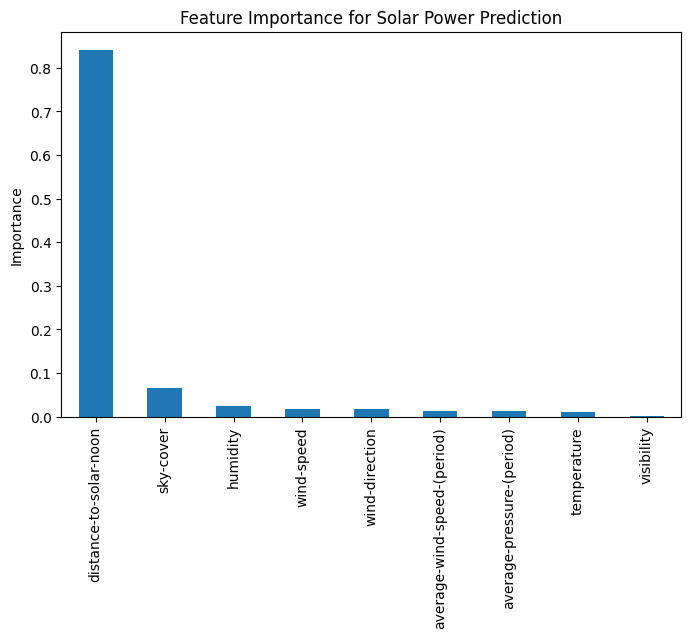

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importance from trained model
importances = rf_model.feature_importances_

# Create a pandas series for easy plotting
feat_imp = pd.Series(importances, index=X_train.columns).sort_values(ascending=False)

print("Feature Importance:")
print(feat_imp)

# Plot
plt.figure(figsize=(8,5))
feat_imp.plot(kind='bar')
plt.title("Feature Importance for Solar Power Prediction")
plt.ylabel("Importance")
plt.show()


In [14]:
# Create a DataFrame with actual and predicted values
predictions = X_test.copy()
predictions['Actual_Power'] = y_test
predictions['Predicted_Power'] = y_pred_rf

# Save to CSV
predictions.to_csv("predicted_solar_output.csv")
print("Predicted solar output saved to predicted_solar_output.csv")


Predicted solar output saved to predicted_solar_output.csv


In [15]:
# Fill missing values if any
X_filled = df_1[X_train.columns].fillna(0)

# Predict for all rows
df_1['Predicted_Power'] = rf_model.predict(X_filled)

# Save to Downloads
downloads_path = "C:\\Users\\dell\\Downloads\\solar_output_with_predictions.csv"
df_1.to_csv(downloads_path, index=False)
print(f"Saved predicted values to: {downloads_path}")


Saved predicted values to: C:\Users\dell\Downloads\solar_output_with_predictions.csv
